# Exploratory Data Análisis (II). 


# **Impuesto sobre Sociedades en España 2018.**
## **Análisis de los ajustes al resultado contable practicados por las sociedades no financieras.**


### 1.  Datos¶

Los datos utilizados para el análisis se han extraido de las estadísticas relativas al Impuesto sobre Sociedades elaboradas por el servicio de estudios tributarios y estadísticos de la Agencia Estatal de la Administración Tributaria (AEAT).

En particular, se ha utilizado la estadística de cuentas anuales no consolidadas del Impuesto sobre Sociedades para el 2018, seccion ajustes al resultado contable de sociedades no financieras (excluyendo aseguradoras, entidades de crédito y IIC), apartado relativo a las sociedades no financieras por Dimensión de empresa y Sector (excluyendo entidades transparentes, exentas y cooperativas).

Para acceder a los datos utilizados en el presente estudio pincha [aquí].

[aquí]:https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/sociedadest2/2018/jrubikf93ce72b23694698d1488983ab0caa1f22b8d675.html

La actividad de cada sociedad se obtiene de la actividad principal que figura en el Censo de grandes empresas, de la actividad declarada en el modelo anual de IVA (modelo 390) y de la información de epígrafes del impuesto de actividades económicas, la cual determina el sector al que pertenece. En función de esta actividad las sociedades se clasifican en 10 agrupaciones sectoriales en términos de la nueva nomenclatura de actividad de la CNAE 2009.
+ Agricultura, Ganadería, Silvicultura y Pesca (A G,S y P)
+ Industria extractiva, Energía y Agua (Indus Extract, E y A)
+ Industria (Industria)
+ Construcción y Actividades inmobiliarias (Constr, Inmob)
+ Comercio, Reparaciones y Transporte (Comercio, rep, transp)
+ Información y Comunicaciones (Info, comunic)
+ Entidades financieras y aseguradoras (Finac, asegur)
+ Servicios a Empresas (Serv empresas)
+ Servicios sociales (Serv sociales)
+ Otros servicios personales y de ocio (Otros serv Ocio)

En el siguiente [enlace] puedes encontrar más información respecto de las anteriores agrupaciones sectoriales.

[enlace]:https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/sociedadest2/2018/docf15e3090a8e97d34e39533482da36a603374ebd1f.html

Precisamente por este nivel de desglose de las agrupaciones sectoriales se ha preferido utilizar las estadísticas de cuentas anuales no consolidadas en vez de las estadísiticas de cuentas anuales consolidadas, que desglosan los datos en cinco agrupaciones sectoriales. Dado que el presente analisis se limita a los ajustes fiscales practicados a la base imponible, se considera que las potenciales diferencias deberían ser inmateriales. 



In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("white")#con seaborn se usa el metodo set.


### 2. Análisis

### 2.1 Distribución por tamaño de las sociedades que presentaron el IS en el período 2018

In [16]:
todas_emp = pd.read_csv("Distribucion sociedades por tamaño 2018.csv", sep = ";", encoding = "Latin") 
todas_emp.dropna(inplace = True)
todas_emp


,Tamaño,Num. Compañías,Porcentaje
0,Pequeñas,1607138,"99,31"
1,Medianas,7252,"0,45"
2,Grandes,3970,"0,25"
3,Total,1618360,"100,00"


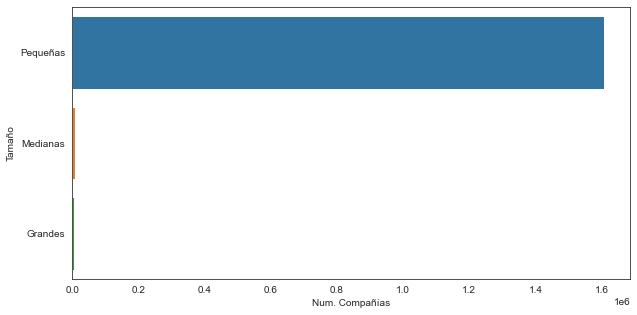

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x = todas_pie["Num. Compañías"], y = todas_pie["Tamaño"], orient = "h");

### 2.2 **Grandes empresas no financieras. Distribución por sector económico**

Se incluyen en la categoría de Grandes empresas (excepto entidades crédito y aseguradoras) aquellas cuyo volumen de operaciones calculado conforme a lo dispuesto en el artículo 121 de la Ley 37/1992 del Impuesto sobre el valor añadido haya superado el importe de 6.010.121,04 de euros.

In [17]:
#Lectura del dataset que contiene el número de grandes empresas por sector económico.
df = pd.read_csv("dataset grandes empresas por sector 2018.csv", sep = ";") 
df

,Todos los sectores,"A G,S y P","Indus Extract, E y A",Industria,"Constr, Inmob","Comercio, rep, transp","Info, comunic",Serv empresas,Serv sociales,Otros serv Ocio,"Finac, asegur"
0,3867,34,102,731,266,915,211,44,861,415,288


In [18]:
#Preparación del dataset para visualización.
grandes_emp = df.transpose().reset_index()
grandes_emp.rename(columns={"index" : "sector", 0 :"num"}, inplace=True)
grandes_emp_pie = grandes_emp[1:11].sort_values("num",ascending = False)

grandes_emp_pie

,sector,num
5,"Comercio, rep, transp",915
8,Serv sociales,861
3,Industria,731
9,Otros serv Ocio,415
10,"Finac, asegur",288
4,"Constr, Inmob",266
6,"Info, comunic",211
2,"Indus Extract, E y A",102
7,Serv empresas,44
1,"A G,S y P",34


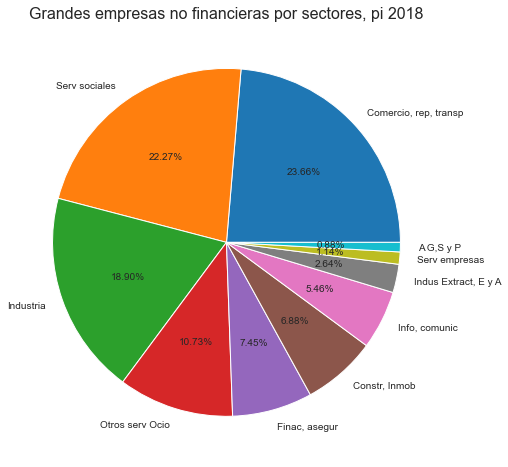

In [56]:
plt.figure(figsize=(8,8))

plt.pie(grandes_emp_pie["num"],
        labels=grandes_emp_pie["sector"], 
        autopct='%1.2f%%')

p=plt.gcf()

plt.title("Grandes empresas no financieras por sectores, pi 2018",fontsize=16);

### 2.3 Análisis de los ajustes al Impuesto sobre Sociedades 2018, sociedades no financieras (grandes empresas)

### **2.3.1. Todos los sectores económicos. Cifras agregadas**

In [3]:
ajustes = pd.read_csv("dataset ajustes IS 2018 CCAA.csv", sep = ";", encoding = "Latin") 


In [73]:
ajustes = round(ajustes)
ajustes

,Partidas,Tipo,Todos los sectores,"A G,S y P","Indus Extract, E y A",Industria,"Constr, Inmob","Comercio, rep, transp","Info, comunic",Serv empresas,Serv sociales,Otros serv Ocio,"Finac, asegur"
0,Resultado contable,NaN,65856363,42437.0,3980447.0,15708255.0,1523387.0,28333373.0,2281264.0,10594375.0,699654.0,3364977.0,-671807.0
1,Operaciones a plazos,Aumento,464771,0.0,2154.0,18808.0,7831.0,376173.0,0.0,84.0,0.0,59720.0,0.0
2,Difs. imputación temporal,Aumento,404410,0.0,2088.0,134061.0,63348.0,78389.0,2058.0,79214.0,25046.0,3592.0,16613.0
3,Difs. amortización contable y fiscal,Aumento,2015092,349.0,683609.0,299768.0,176480.0,261579.0,167044.0,361342.0,38449.0,24704.0,1770.0
4,Amortización inmov. intangible,Aumento,925456,0.0,14892.0,105351.0,49592.0,286798.0,92456.0,288161.0,31867.0,52087.0,4251.0
5,Reversión libertad amortización,Aumento,1267200,762.0,390582.0,398431.0,15072.0,191293.0,193091.0,42670.0,12568.0,22659.0,72.0
6,Deterioro cuentas por cobrar,Aumento,3810656,1989.0,2839301.0,121654.0,138770.0,360748.0,129402.0,163276.0,37844.0,15359.0,2312.0
7,Deterioro inmovilizado material y FdC,Aumento,1641272,0.0,200826.0,126980.0,143369.0,414848.0,279676.0,141495.0,56423.0,118665.0,158990.0
8,Deterioro participación en FFPP,Aumento,18556474,5807.0,1176103.0,1135701.0,1646207.0,5767895.0,162518.0,6726157.0,56141.0,126485.0,1753458.0
9,Pagos en instrum. pat. y fondos internos,Aumento,610711,525.0,13189.0,212104.0,40798.0,230117.0,31237.0,59741.0,1762.0,7192.0,14047.0


El modelo 200 de declaración del periodo impositivo 2018 incluye un total de 168 ajustes fiscales al resultado contable.

Para realizar este estudio se ha realizado una selección previa de los ajustes fiscales en función de su relevancia económica e interés a estos efectos, así como su agrupación por conceptos, de tal modo que **el alcance se ha limitado a 40 categorías de ajustes fiscales en total, 20 aumentos y 20 disminuciones**.

Los importes en encuentran en miles de euros.

In [10]:
round(ajustes.groupby("Tipo")["Todos los sectores"].describe())

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Aumento,20.0,2355247.0,4265761.0,122272.0,455189.0,951128.0,1734727.0,18556474.0
Disminución,20.0,4486544.0,13004507.0,102264.0,681208.0,873032.0,1907465.0,59115092.0


In [9]:
ajustes.groupby("Tipo")["Todos los sectores"].sum()

Tipo
Aumento        47104943
Disminución    89730872
Name: Todos los sectores, dtype: int64

#### **Visualización de los aumentos (todos los sectores) en un pie chart**

In [12]:
#creo una máscara para filtrar los ajustes fiscales de tipo aumento y creo un dataframe "ajustes_aum" al aplicarlo 
#al dataframe original "ajustes"

ajustes_aum = ajustes[ajustes["Tipo"].isin(["Aumento"])][["Partidas", "Tipo", "Todos los sectores"]]

In [26]:
#Creo un dataframe con todos los aumentos ordenados de mayor a menor y creo un nuevo dataframe con los ajustes ordenados de 
#forma descendente y sin incluir el registro "RESTO aumentos al resultado contable, que es un cajón desastre. 
#Cifras en miles de euros.

todos_sort = ajustes_aum.sort_values("Todos los sectores", ascending=False)
todos_sort

,Partidas,Tipo,Todos los sectores
8,Deterioro participación en FFPP,Aumento,18556474
10,Provisiones no deducibles,Aumento,8668565
6,Deterioro cuentas por cobrar,Aumento,3810656
15,Transmisiones lucrativas y societarias,Aumento,2798156
3,Difs. amortización contable y fiscal,Aumento,2015092
7,Deterioro inmovilizado material y FdC,Aumento,1641272
5,Reversión libertad amortización,Aumento,1267200
18,AIEs/UTEs,Aumento,1066359
19,Régimen especial op.reestructuración,Aumento,1005645
16,Efectos valor contable distinto valor fiscal,Aumento,976799


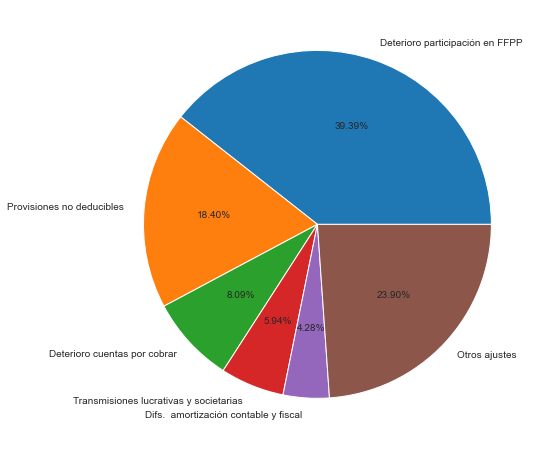

In [104]:
#Represento en un pieplot la distribución de los aumentos más relevantes y agrupo el resto en la categoría "otros ajustes". 

#the top 5
todos_pie = todos_sort[:5].copy()

#others
new_row = pd.DataFrame(data = {
    "Partidas" : ["Otros ajustes"],
    "Todos" : [todos_sort["Todos"][5:].sum()]
})

#combining top 5 with others
todos_pie = pd.concat([todos_pie, new_row])

plt.figure(figsize=(8,8))
plt.pie(todos_pie["Todos"],
        labels= todos_pie["Partidas"],
        autopct='%1.2f%%')
p=plt.gcf()

#### Visualización de las disminuciones (todos los sectores) en un pie chart

,Partidas,Tipo,Todos los sectores
36,Exencion dividendos/trans. Participaciones,Disminución,59115092
32,Provisiones no deducibles,Disminución,7748134
30,Deterioro participación en FFPP,Disminución,6222766
38,GIS extranjero no DDI art.31.2 LIS,Disminución,2458772
41,Otras correcciones,Disminución,2029648
37,Exención rentas Eps,Disminución,1866737
25,Difs. amortización contable y fiscal,Disminución,1242779
26,Reversión ajuste 30% amortización,Disminución,1217802
34,Transmisiones lucrativas y societarias,Disminución,937491
39,AIEs/UTEs,Disminución,897497


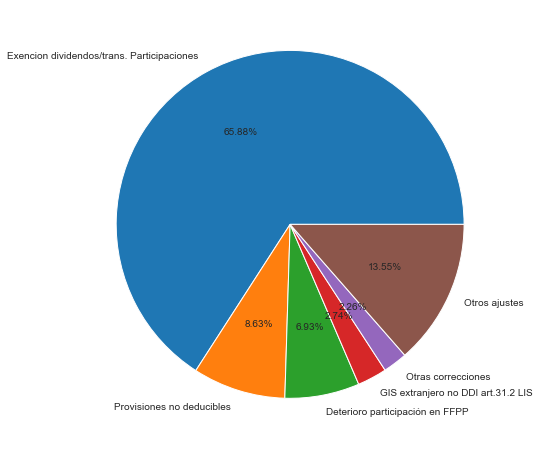

In [19]:
#Seguimos el mismo procedimiento que con los aumentos.
#Cifras en miles de euros.
                     
ajustes_dism = ajustes[ajustes["Tipo"].isin(["Disminución"])][["Partidas", "Tipo", "Todos los sectores"]]

todos_sort_dism = ajustes_dism.sort_values("Todos los sectores", ascending=False)

display(todos_sort_dism)

#Represento en un pieplot la distribución de los aumentos más relevantes y agrupo el resto en la categoría "otros ajustes". 

#the top 5
todos_pie = todos_sort_dism[:5].copy()

#others
new_row = pd.DataFrame(data = {
    "Partidas" : ["Otros ajustes"],
    "Todos los sectores" : [todos_sort_dism["Todos los sectores"][5:].sum()]
})

#combining top 5 with others
todos_pie = pd.concat([todos_pie, new_row])

plt.figure(figsize=(8,8))
plt.pie(todos_pie["Todos los sectores"],
        labels= todos_pie["Partidas"],
        autopct='%1.2f%%')
p=plt.gcf() 


#### Visualización de los outliers utilizando un gráfico de cajas.

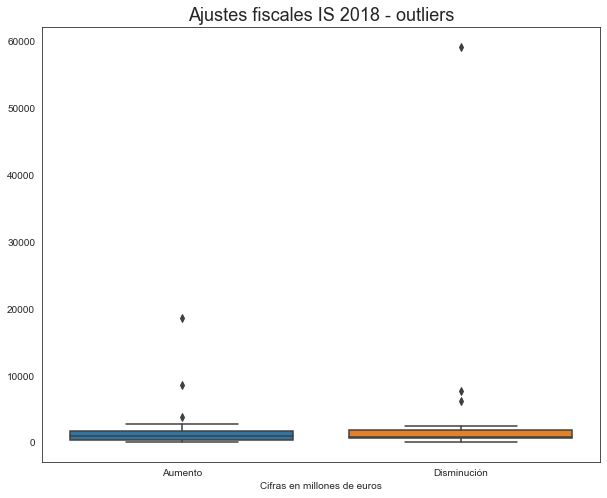

In [32]:
plt.figure(figsize=(10,8))

todos_plot = pd.concat([todos_sort,todos_sort_dism])

todos_plot["Todos los sectores"] = todos_plot["Todos los sectores"]/1000

sns.boxplot(x='Tipo', y='Todos los sectores', data=todos_plot)

plt.xlabel("Cifras en miles de euros")
plt.ylabel("")

plt.title("Ajustes fiscales IS 2018 - outliers",fontsize=18);


### **2.3.1. Análisis por sectores económicos. Cifras agregadas**

In [79]:
def ajustes_agregado(df,nombre_sector):    
    
    """
    Funcion que pinta dos gráficas de barras que muestran los principales ajustes fiscales (aumentos y disminuciones) 
    al Impuesto sobre Sociedades ejercicio 2018 para cada sector económico.
    
    En primer lugar la función aplica una máscara que filtra el dataset según el tipo del ajuste sea aumento o disminución.
    
    Despues ordena los valores de los ajustes tipo aumento y genera su gráfica.
    
    Por último, ordena los valores de los ajustes tipo disminución y genera la gráfica.
    """
       
    ajustes_aum = ajustes[ajustes["Tipo"].isin(["Aumento"])][["Partidas", nombre_sector]].sort_values(nombre_sector,ascending=False)
    ajustes_dism = ajustes[ajustes["Tipo"].isin(["Disminución"])][["Partidas", nombre_sector]].sort_values(nombre_sector,ascending=False)
    ajustes_aum[nombre_sector] = ajustes_aum[nombre_sector]/1000
    ajustes_dism[nombre_sector] = ajustes_dism[nombre_sector]/1000
    
    plt.figure(figsize=(15,8))
    figA = sns.barplot(x= nombre_sector, y= "Partidas", data = ajustes_aum, orient= "h", palette = "rocket")
    figA.set(xlabel="Cifras en millones de euros", ylabel="", title = "Ajustes fiscales IS 2018 - Aumentos a la base imponible\n")
                 
    plt.figure(figsize=(15,8))
    figB = sns.barplot(x= nombre_sector, y= "Partidas", data = ajustes_dism, orient= "h", palette = "crest") 
    figB.set(xlabel="Cifras en millones de euros", ylabel="", title = "Ajustes fiscales IS 2018 - Disminuciones a la base imponible\n")
       
    return figA,figB

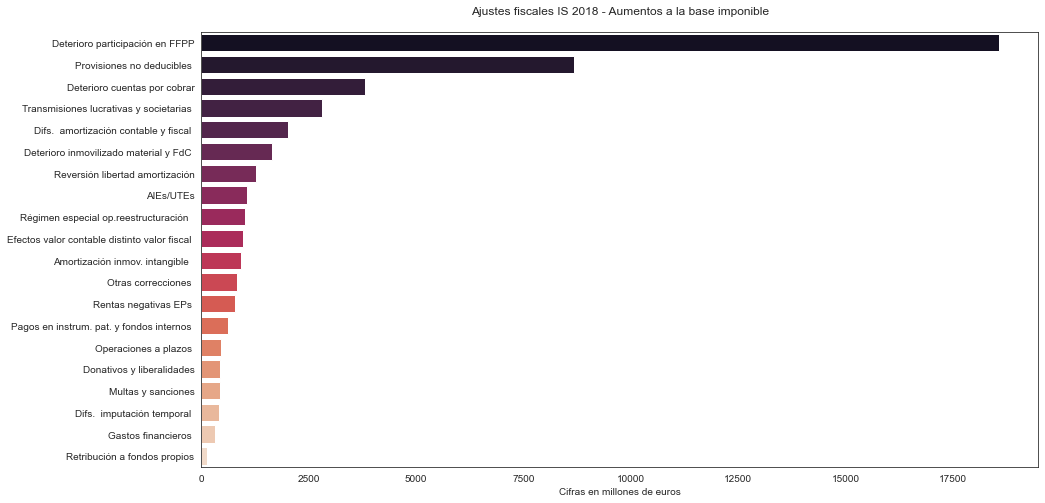

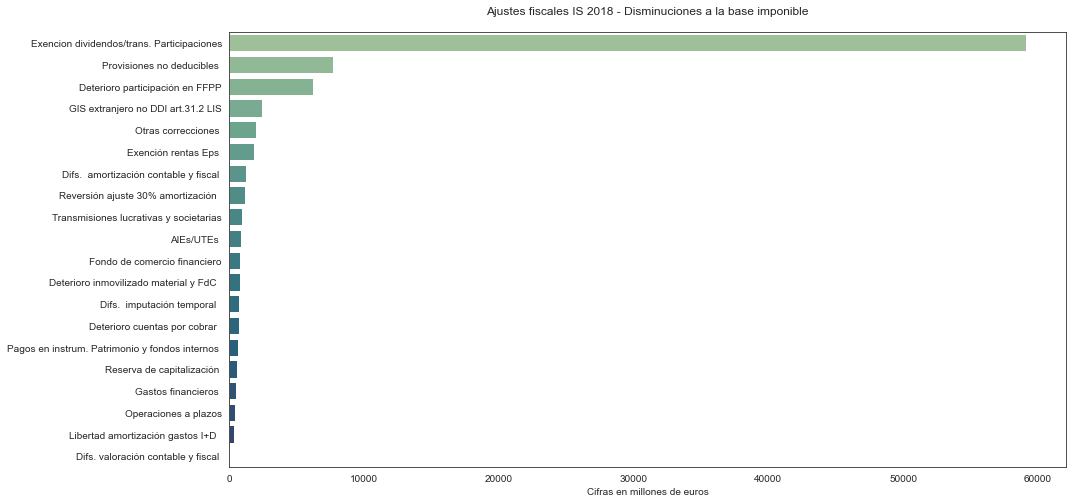

In [80]:
#TODOS LOS SECTORES

fig1, fig2 = ajustes_agregado(ajustes,"Todos los sectores")

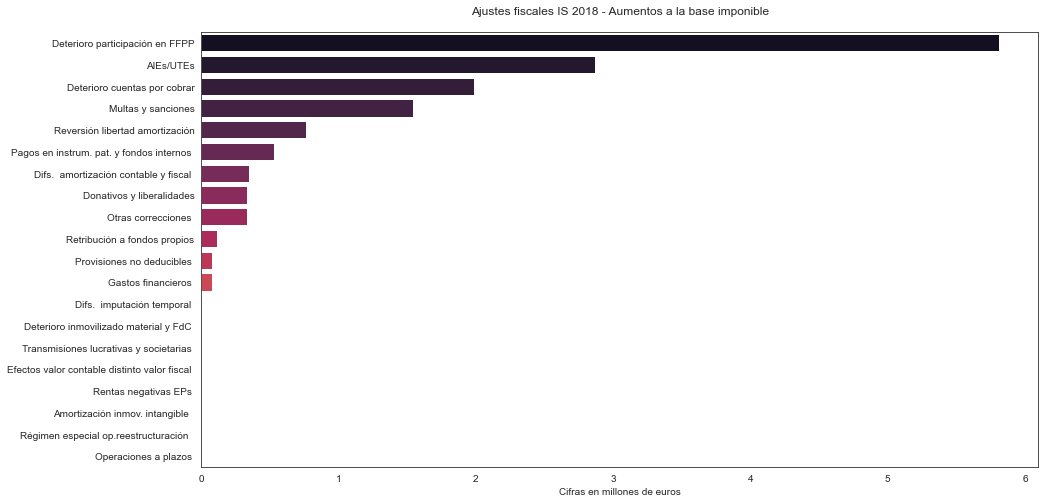

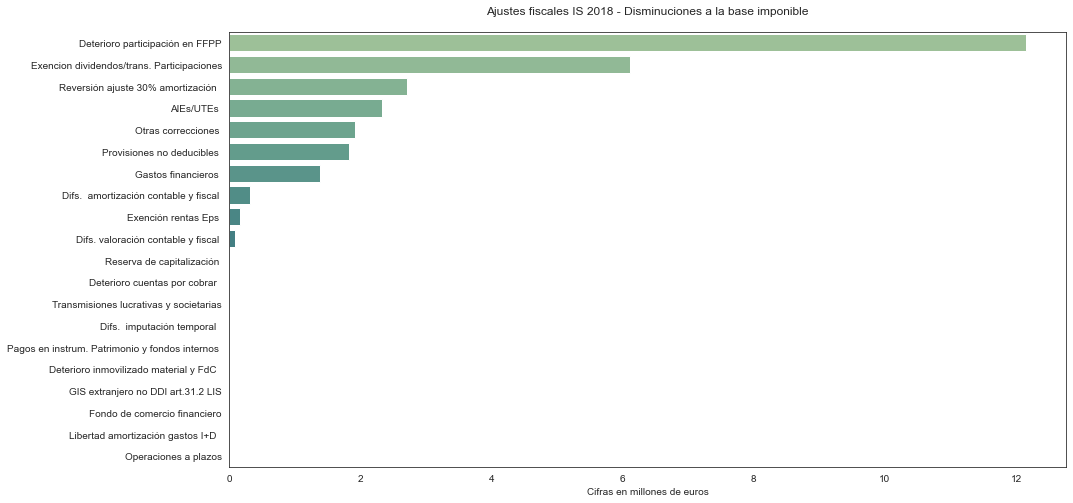

In [81]:
#AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA

fig1, fig2 = ajustes_agregado(ajustes,"A G,S y P")

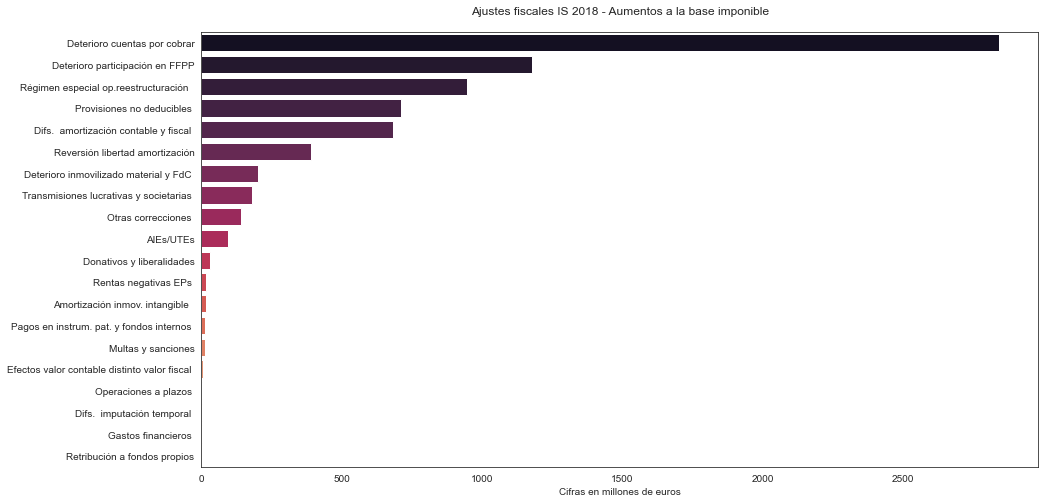

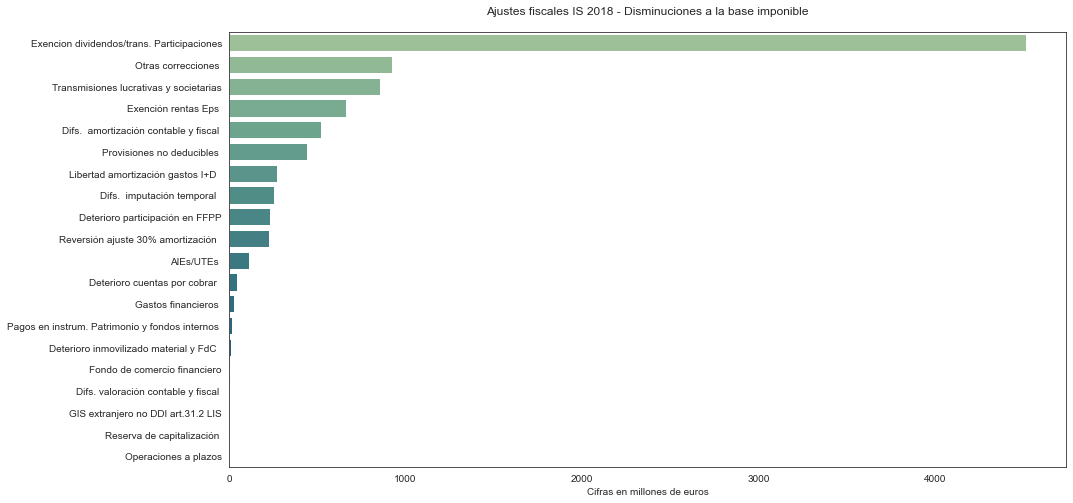

In [82]:
#INDUSTRÍA EXTRACTIVA, ENERGIA Y AGUA

fig1, fig2 = ajustes_agregado(ajustes,"Indus Extract, E y A")

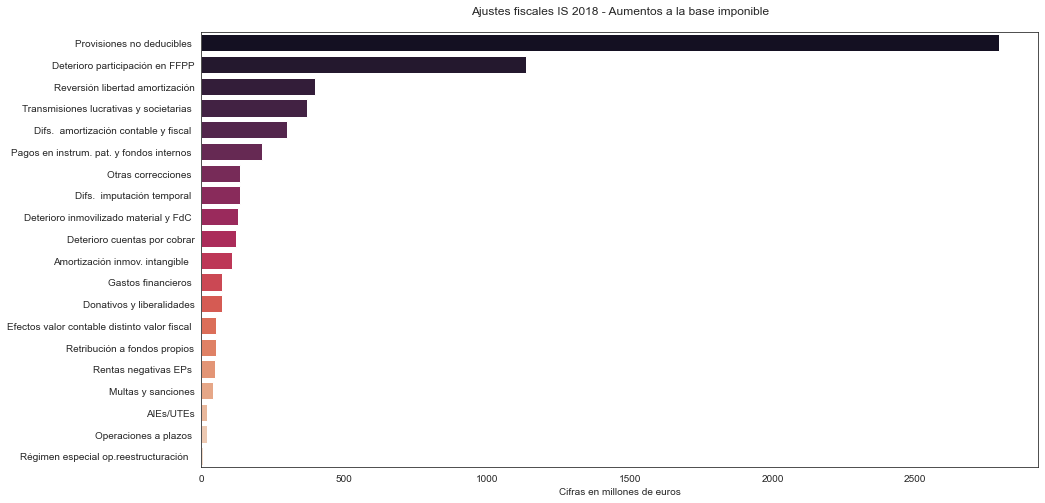

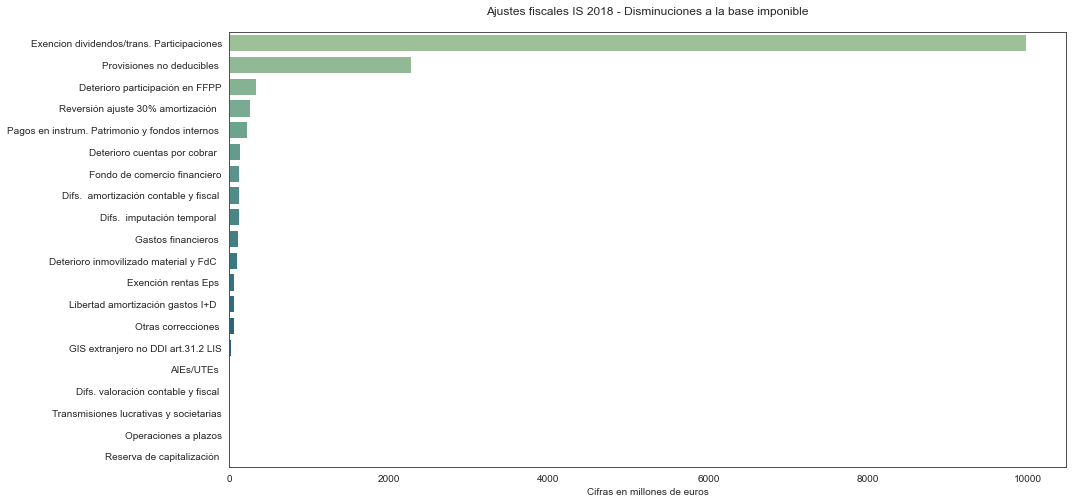

In [83]:
#INDUSTRÍA

fig1, fig2 = ajustes_agregado(ajustes,"Industria")

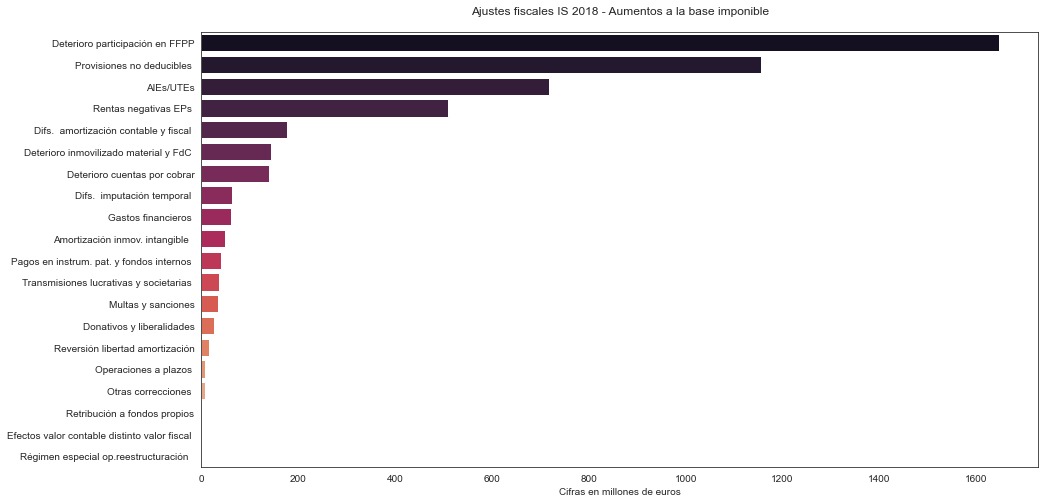

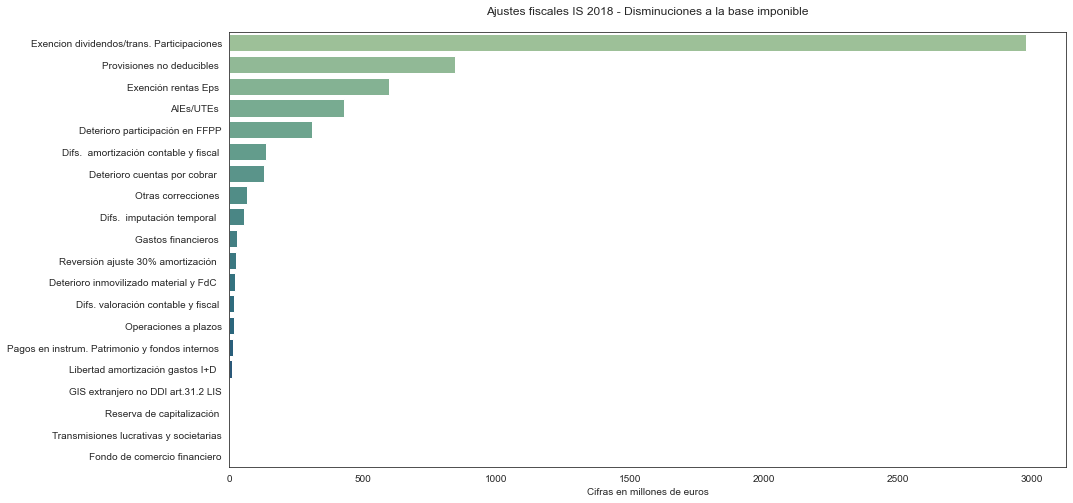

In [84]:
#CONSTRUCCIÓN, ACTIVIDADES INMOBILIARIAS

fig1, fig2 = ajustes_agregado(ajustes,"Constr, Inmob")

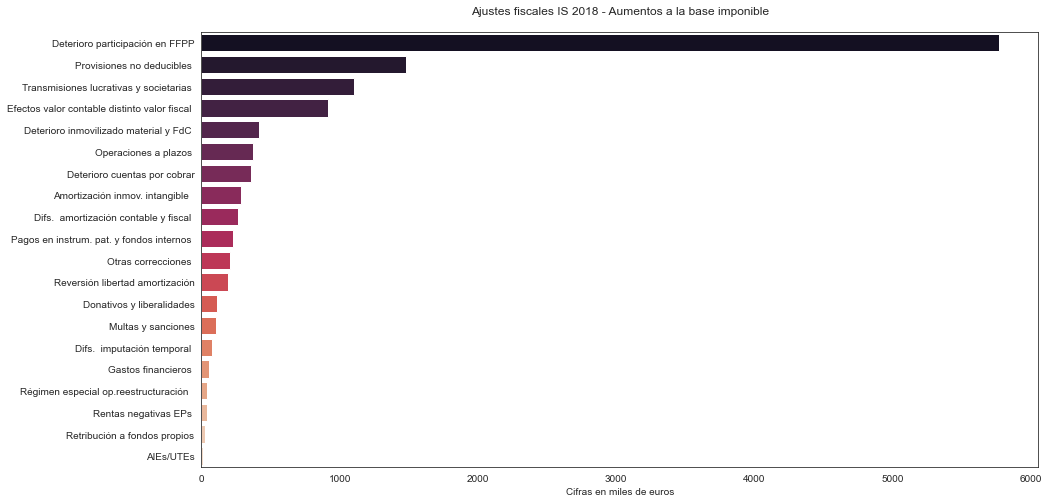

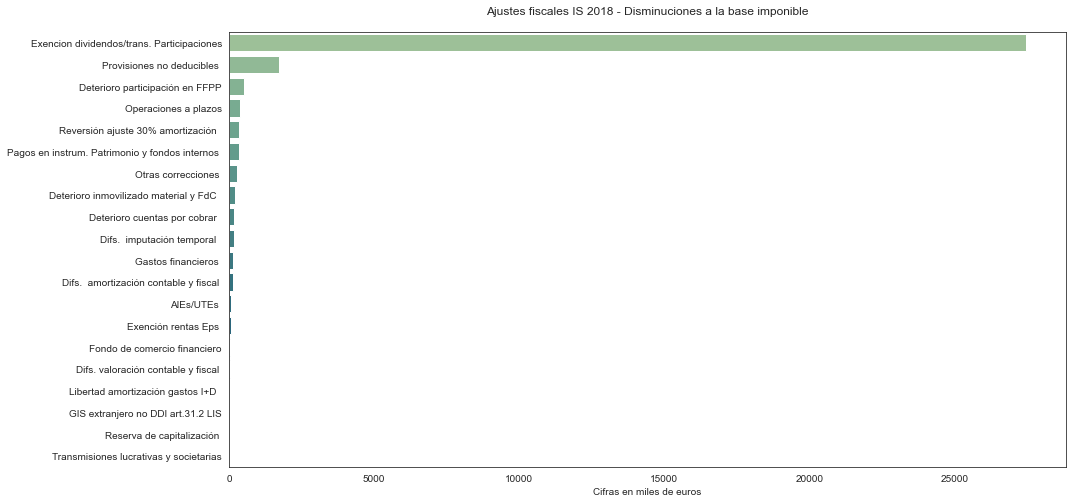

In [68]:
#COMERCIO, REPARACIONES Y TRANSPORTE. 

fig1, fig2 = ajustes_agregado(ajustes,"Comercio, rep, transp")

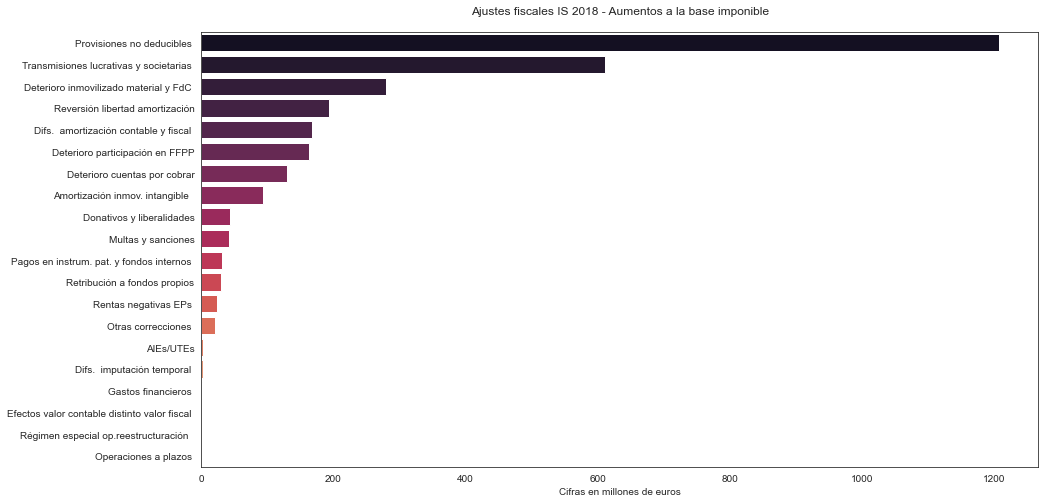

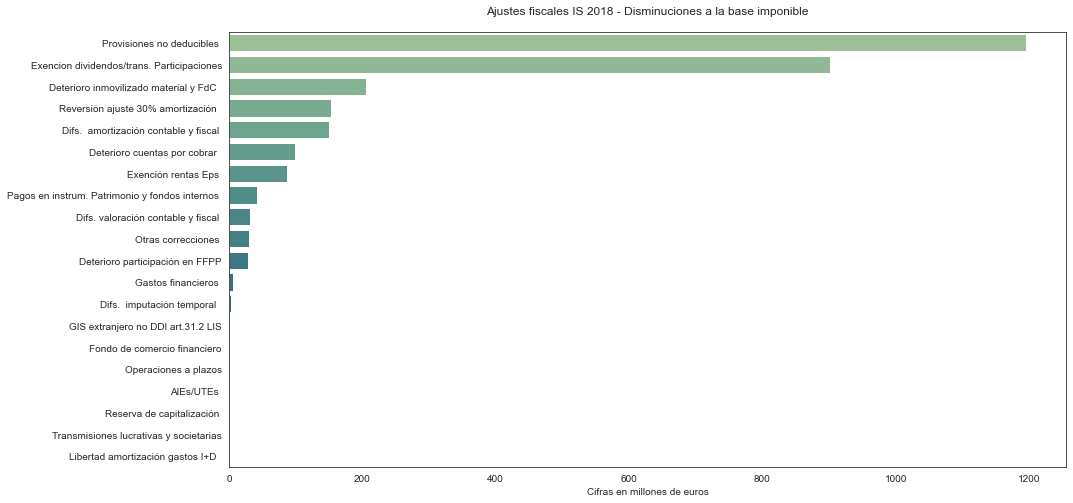

In [85]:
#INFORMACIÓN Y COMUNICACIONES

fig1, fig2 = ajustes_agregado(ajustes,"Info, comunic")

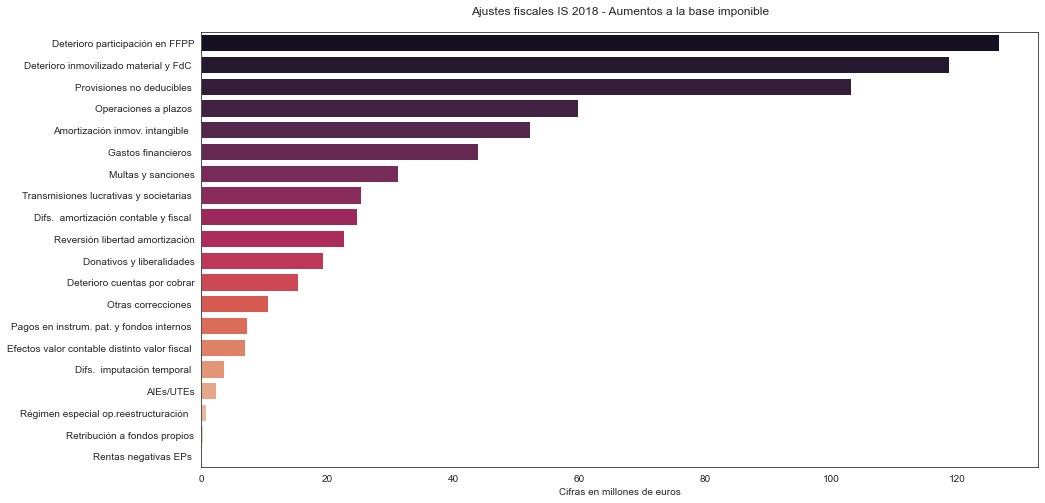

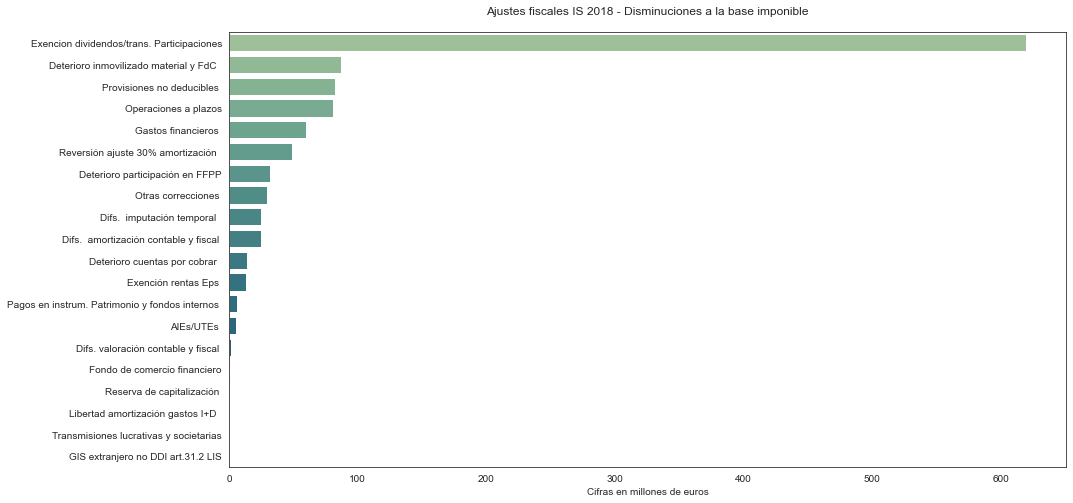

In [86]:
#SERVICIOS OCIO

fig1, fig2 = ajustes_agregado(ajustes,"Otros serv Ocio")

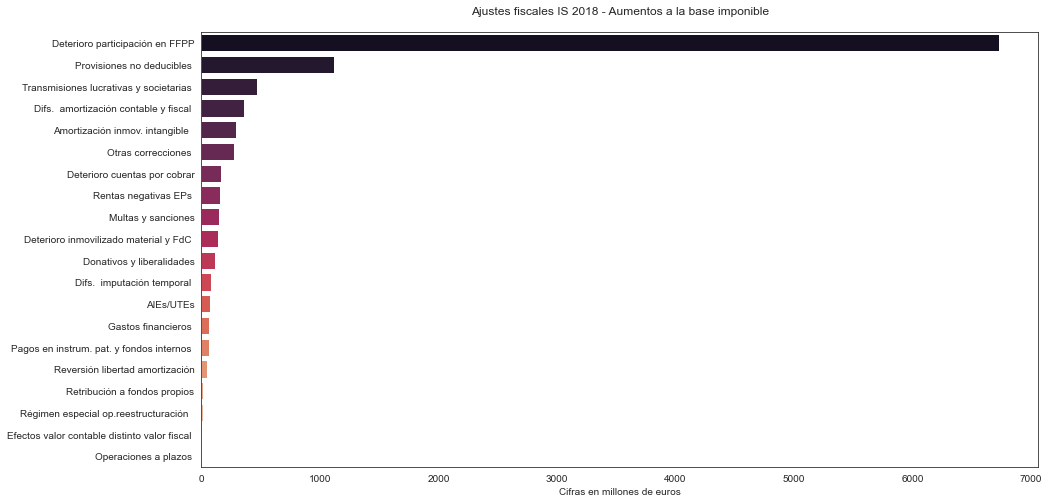

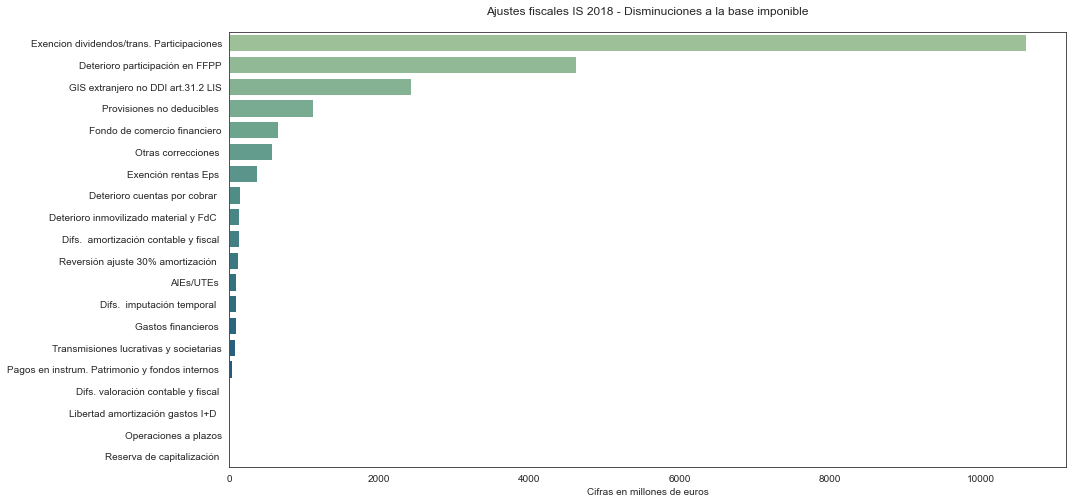

In [88]:
#SERVCIOS A EMPRESAS

fig1, fig2 = ajustes_agregado(ajustes,"Serv empresas")

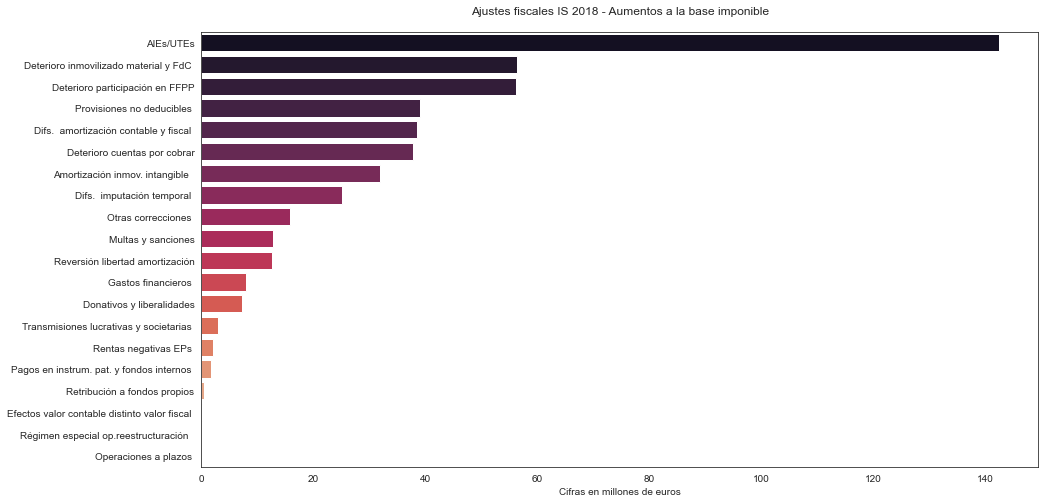

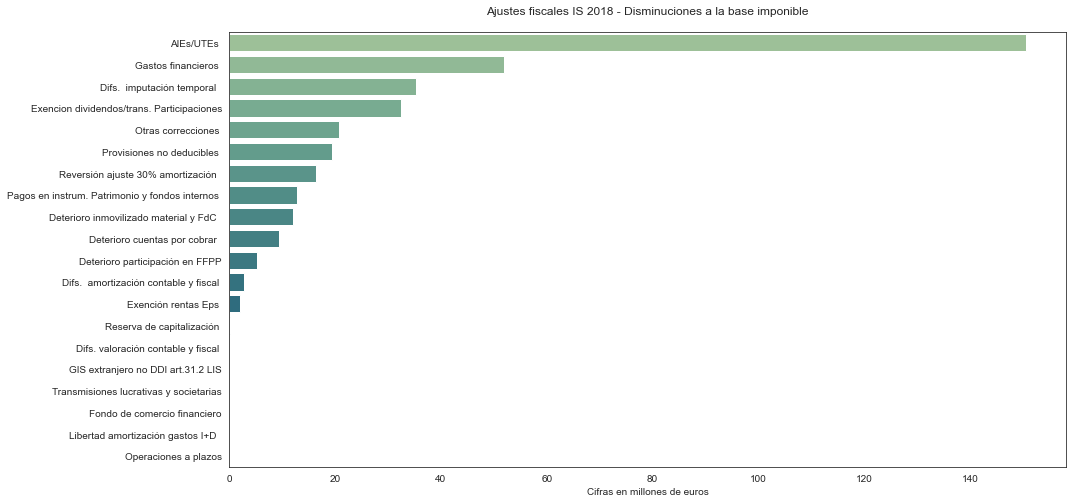

In [87]:
#SERVICIOS SOCIALES

fig1, fig2 = ajustes_agregado(ajustes,"Serv sociales")

### **2.3.2. Análisis de ajustes fiscales específicos respecto de todos los sectores . Cifras agregadas**

In [92]:
ajustes = pd.read_csv("dataset ajustes IS 2018 CCAA.csv", sep = ";", encoding = "Latin") 
ajustes = round(ajustes)

def analisis_ajustes(df,nombre_ajuste):   
    
    """
    Esta función recibe el dataframe de ajustes fiscales y el concreto ajuste fiscal que se quiere analizar como argumentos.
    
    La función genera un dataframe con el importe de un determinado ajuste fiscal (aumento y reversión, si la haya) 
    para cada uno de los sectores económicos y genera un gráfico de barras que muestra el importe del dicho 
    ajuste para todos ellos. 
    
    Según el signo del ajuste fiscal se generará un gráfico de aumentos o de disminuciones, 
    o bien los dos gráficos en caso de que el ajuste fiscal en cuestión se presente tanto en forma de aumento como de reversión.
    
    """
    
    df = ajustes[ajustes["Partidas"].str.startswith(nombre_ajuste)]
    df.set_index(keys = "Tipo", inplace = True)
    df = df.drop(columns = ["Todos los sectores","Finac, asegur","Partidas"])
    df = df.T
    a_ajuste = df.reset_index()
    a_ajuste.rename(columns={"index" : "sector"}, inplace=True)
    display(a_ajuste)
       
    def grafico_aumento(a_ajuste):
    
        fig1 = plt.figure(figsize=(15,8))#otra opción es hacer el gráfico de 13,6 e incluir rotation para labels del eje x.
        
        plt.title(nombre_ajuste, fontsize=14)
        #plt.xticks(rotation =  45)
        
        sns.lineplot(data = a_ajuste,
                        x = "sector",
                        y = "Aumento",
                        linewidth = 3);

        sns.barplot(data = a_ajuste,
                        x = "sector",
                        y = "Aumento",
                        linewidth = 3);
              
    def grafico_disminucion(a_ajuste):
    
        fig2 = plt.figure(figsize=(15,8))
        #plt.xticks(rotation =  45)

        plt.title(nombre_ajuste, fontsize=14);

        sns.lineplot(data = a_ajuste,
                        x = "sector",
                        y = "Disminución",
                        linewidth = 3);

        sns.barplot(data = a_ajuste,
                        x = "sector",
                        y = "Disminución",
                        linewidth = 3);

    if "Aumento" in a_ajuste and "Disminución" in a_ajuste:
        
        fig1 = grafico_aumento(a_ajuste)
        fig2 = grafico_disminucion(a_ajuste)
        
        return fig1,fig2

    else:
    
        if "Aumento" in a_ajuste:
            fig1 = grafico_aumento(a_ajuste)
            return fig1

        else:
            fig2 = grafico_disminucion(a_ajuste)
            return fig2 


Tipo,sector,Disminución
0,"A G,S y P",4.0
1,"Indus Extract, E y A",5.0
2,Industria,185.0
3,"Constr, Inmob",18.0
4,"Comercio, rep, transp",153.0
5,"Info, comunic",6.0
6,Serv empresas,3.0
7,Serv sociales,203.0
8,Otros serv Ocio,7.0


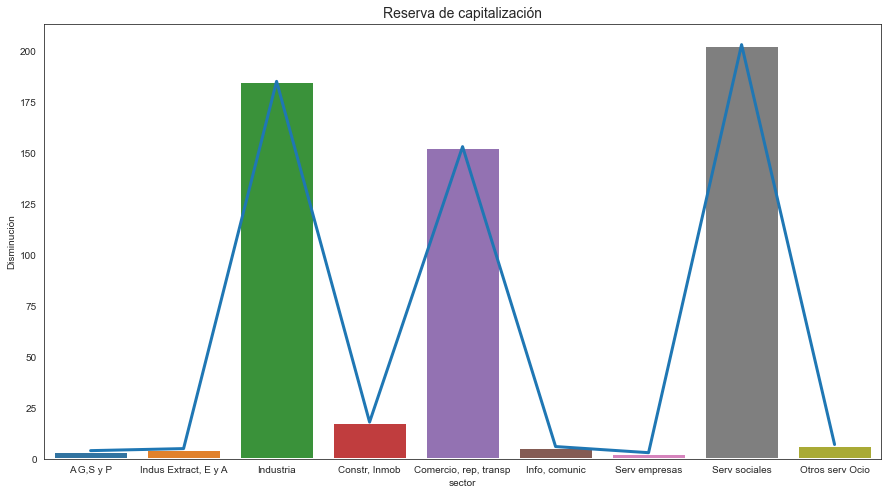

In [101]:
fig2 = analisis_ajustes(ajustes,"Reserva de capitalización")

Tipo,sector,Disminución
0,"A G,S y P",6117.0
1,"Indus Extract, E y A",4516792.0
2,Industria,9975146.0
3,"Constr, Inmob",2978300.0
4,"Comercio, rep, transp",27457441.0
5,"Info, comunic",901275.0
6,Serv empresas,10606502.0
7,Serv sociales,32443.0
8,Otros serv Ocio,619764.0


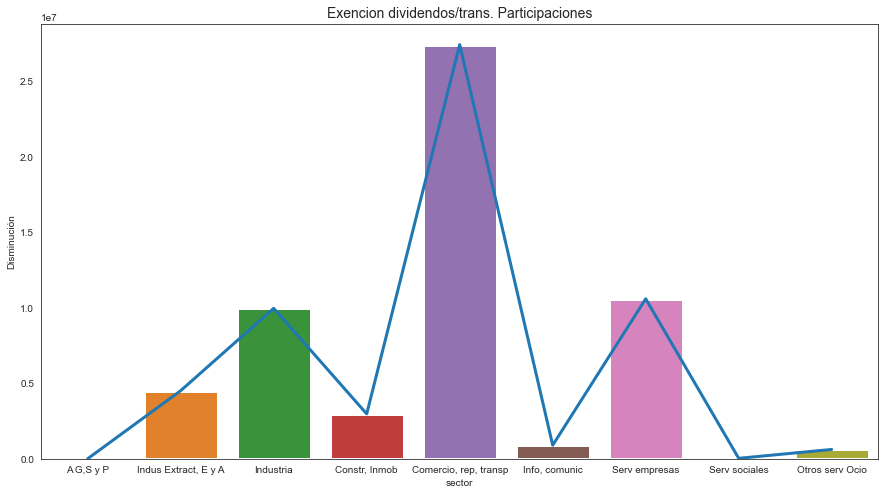

In [100]:
fig2 = analisis_ajustes(ajustes,"Exencion dividendos/trans. Participaciones")

Tipo,sector,Aumento,Disminución
0,"A G,S y P",75.0,1382.0
1,"Indus Extract, E y A",474.0,30437.0
2,Industria,72025.0,119189.0
3,"Constr, Inmob",60351.0,31320.0
4,"Comercio, rep, transp",54715.0,151828.0
5,"Info, comunic",791.0,6093.0
6,Serv empresas,66886.0,94410.0
7,Serv sociales,8038.0,52018.0
8,Otros serv Ocio,43854.0,60037.0


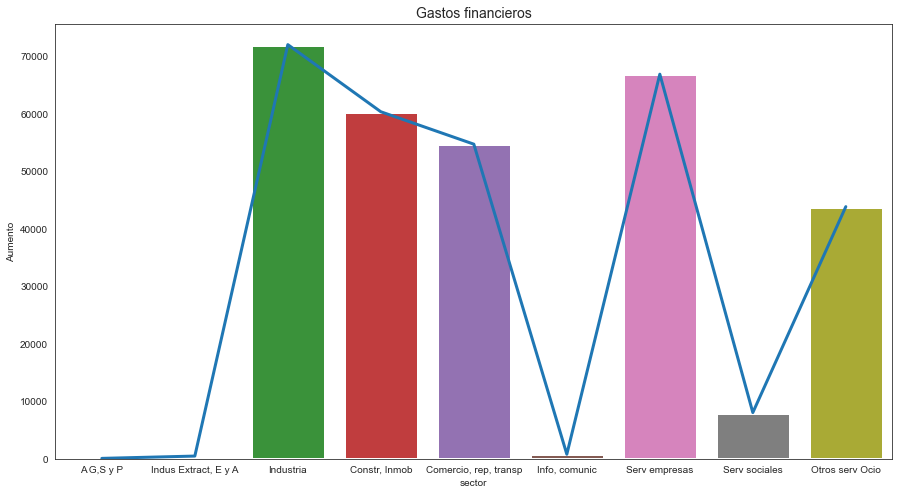

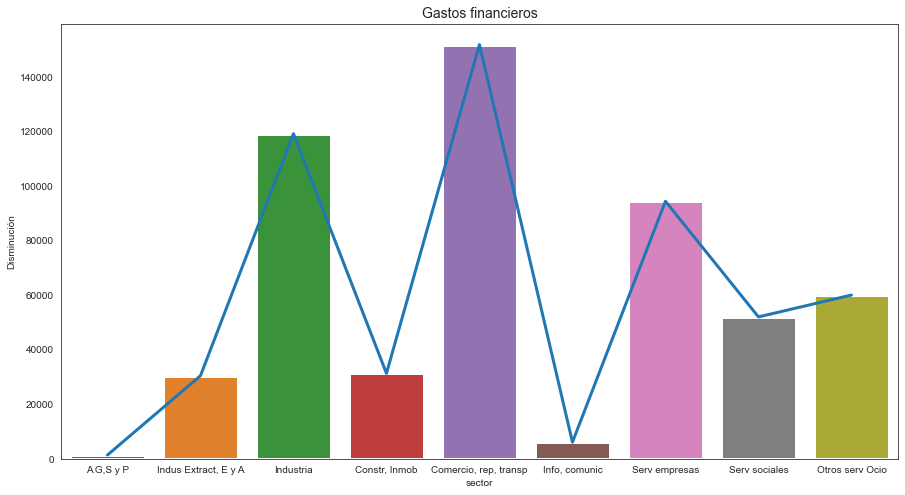

In [94]:
fig1,fig2 = analisis_ajustes(ajustes,"Gastos financieros")

Tipo,sector,Aumento
0,"A G,S y P",1544.0
1,"Indus Extract, E y A",12290.0
2,Industria,40763.0
3,"Constr, Inmob",33586.0
4,"Comercio, rep, transp",102344.0
5,"Info, comunic",41184.0
6,Serv empresas,145990.0
7,Serv sociales,12742.0
8,Otros serv Ocio,31221.0


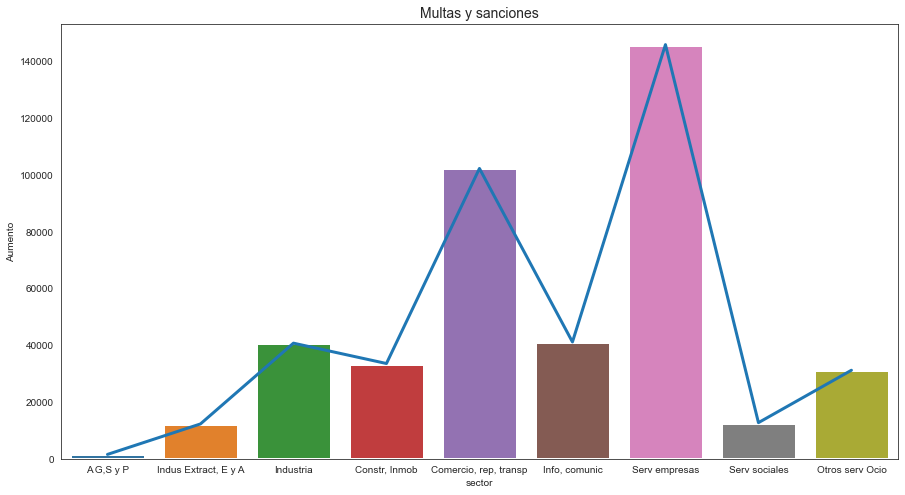

In [95]:
fig1 = analisis_ajustes(ajustes,"Multas y sanciones")

Tipo,sector,Disminución
0,"A G,S y P",0.0
1,"Indus Extract, E y A",85.0
2,Industria,24448.0
3,"Constr, Inmob",1443.0
4,"Comercio, rep, transp",2185.0
5,"Info, comunic",2065.0
6,Serv empresas,2428543.0
7,Serv sociales,0.0
8,Otros serv Ocio,0.0


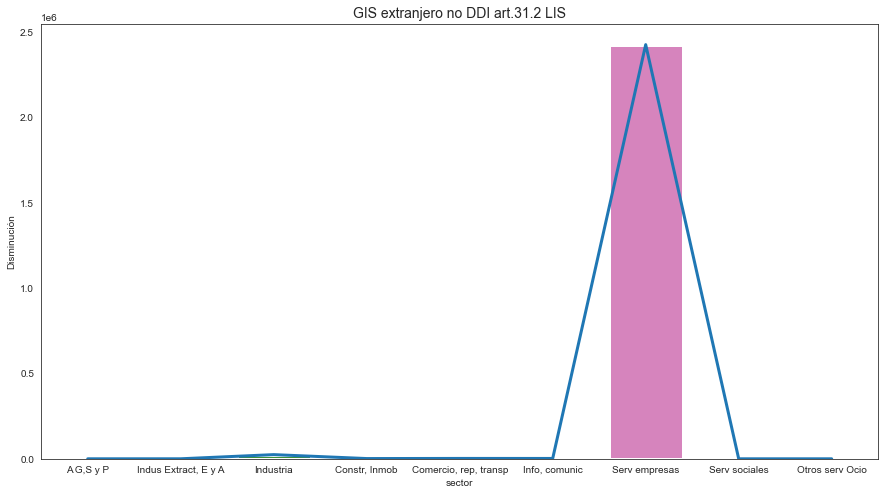

In [96]:
fig2 = analisis_ajustes(ajustes,"GIS extranjero no DDI art.31.2 LIS")

Tipo,sector,Aumento,Disminución
0,"A G,S y P",2869.0,2332.0
1,"Indus Extract, E y A",93854.0,115483.0
2,Industria,19711.0,8740.0
3,"Constr, Inmob",717129.0,429969.0
4,"Comercio, rep, transp",10180.0,85555.0
5,"Info, comunic",2622.0,140.0
6,Serv empresas,74944.0,98794.0
7,Serv sociales,142381.0,150487.0
8,Otros serv Ocio,2303.0,5463.0


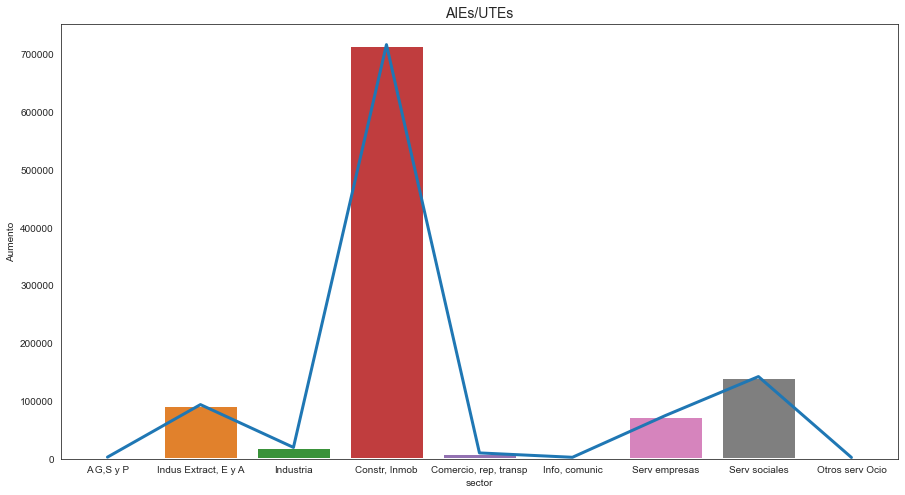

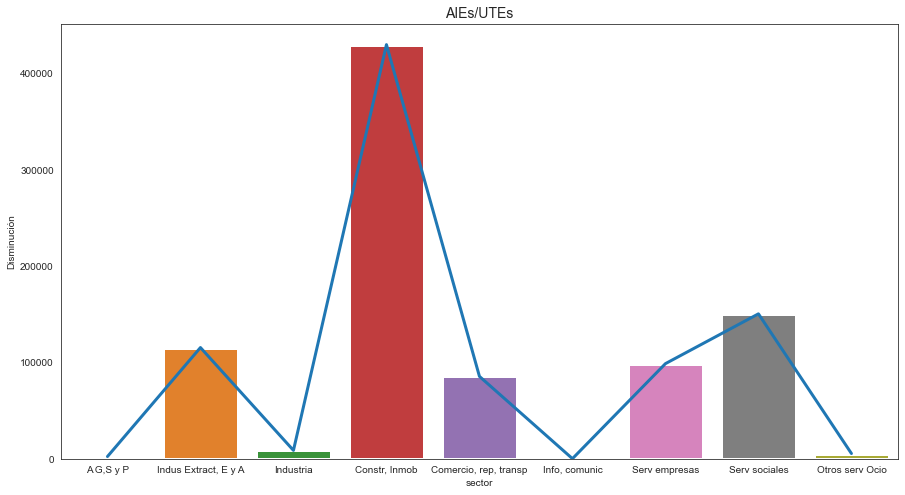

In [97]:
fig1,fig2 = analisis_ajustes(ajustes,"AIEs/UTEs") 

Tipo,sector,Aumento
0,"A G,S y P",114.0
1,"Indus Extract, E y A",175.0
2,Industria,49528.0
3,"Constr, Inmob",1539.0
4,"Comercio, rep, transp",25157.0
5,"Info, comunic",29829.0
6,Serv empresas,15284.0
7,Serv sociales,442.0
8,Otros serv Ocio,205.0


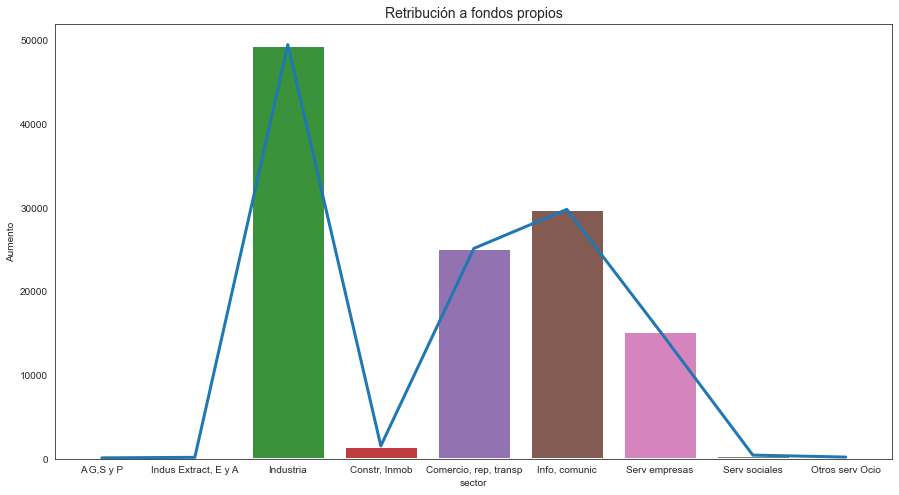

In [98]:
fig1 = analisis_ajustes(ajustes,"Retribución a fondos propios") 